### Ekplorasi Data

#### Power BI

Get data menggunakan script python di Power BI

- Masuk Power BI
- klik Get data > python script
- paste code dibawah ini


#### Menghubungkan Power BI ke Database via Python Script

Pastikan kamu sudah install:

- `mysql-connector-python` (untuk MySQL)
- `psycopg2` atau `sqlalchemy` (untuk PostgreSQL)
- `pandas`
- `dotenv`

*Contoh Script untuk MySQL (Local)*

In [1]:
import pandas as pd
from sqlalchemy import create_engine

USER = "root"
PASSWORD = ""
HOST = "localhost"
PORT = 3306
DBNAME = "iris_dataset"

# Buat koneksi ke MySQL (pakai driver PyMySQL)
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Query ke database MySQL
query = "SELECT * FROM iris;"
df = pd.read_sql(query, engine)

dataset = df

*Contoh Script untuk PostgreSQL (Supabase)*

In [4]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

engine = create_engine(f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

query = "SELECT * FROM iris_full;"
df = pd.read_sql(query, engine)

dataset = df


![gambar dari 2 database](images/image-from-2-database.png)

#### Proses Penggabungan

Setelah data masuk ke Power BI (baik dari Python atau koneksi langsung DB), alurnya:

- Masuk ke menu Transform

![gambar dari transform menu](images/image-transform-menu.png)

- Jika strukturnya sama (misalnya tabel transaksi MySQL dan PostgreSQL punya kolom yang sama), gunakan Append Queries → jadi satu tabel gabungan.
- Jika hanya ingin join berdasarkan ID tertentu, gunakan Merge Queries (INNER JOIN, LEFT JOIN, dll).
- Klik Close & Apply → data siap dianalisis di Power BI.

![gambar dari transform menu](images/image-merge-queries.png)

*Hasil Merge kedua table*

![gambar dari transform menu](images/image-merged-table.png)

#### Konsep Outlier dengan KNN

KNN (k-Nearest Neighbors) untuk deteksi outlier biasanya pakai pendekatan distance-based:

- Setiap titik dihitung jaraknya ke tetangga terdekat.
- Kalau jaraknya jauh dari mayoritas titik → dianggap outlier.
- Metode populer: kNN Distance atau Local Outlier Factor (LOF).

---

*Contoh code untuk Outlier Detection menggunakan KNN*

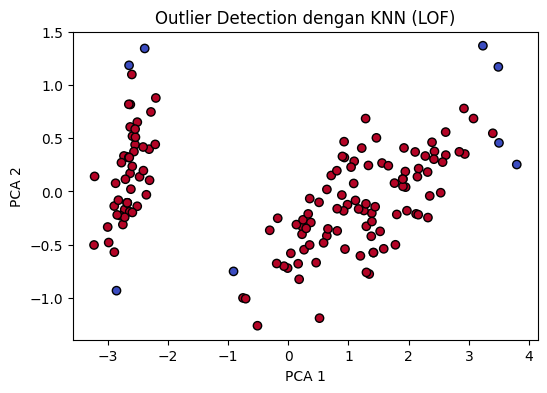

In [5]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame(iris_merged.PetalLengthCm, Id, iris_merged.PetalWidthCm, SepalLengthCm, SepalWidthCm)
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Copy dataset dari Power BI
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Copy dataset dari Power BI
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

# Copy dataset Power BI
dataset = dataset.copy()

# Pilih fitur numerik
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# KNN Outlier Detection (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # contamination=5% dianggap outlier
y_pred = lof.fit_predict(X)

# Tambah kolom hasil ke dataset
dataset['outlier'] = y_pred  # -1 = outlier, 1 = normal

# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=dataset['outlier'],
    cmap='coolwarm',
    edgecolor='k'
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Outlier Detection dengan KNN (LOF)")
plt.show()


*Contoh code K-Means clustering*

In [ ]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame(iris_from_postgresql.PetalLengthCm, iris_from_postgresql.PetalWidthCm, SepalLengthCm, SepalWidthCm)
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Copy dataset dari Power BI
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Copy dataset dari Power BI
dataset = dataset.copy()

# Pilih fitur (pakai semua fitur kalau sudah ada di dataset)
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# K-Means clustering (3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dataset['cluster'] = kmeans.fit_predict(X)

# PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
dataset['pca1'] = X_pca[:, 0]
dataset['pca2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(6,4))
plt.scatter(
    dataset['pca1'],
    dataset['pca2'],
    c=dataset['cluster'],
    cmap='viridis',
    edgecolor='k'
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering Iris dengan K-Means")
plt.show()


*Hasil Python Visualisasi*

![gambar dari transform menu](images/image-visual-knn-outlier-and-kmean.png)